In [1]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt


CARGAR MODELO ENTRENADO

In [3]:
model = tf.keras.models.load_model("fossil_classifier.keras")

cagar las clases

In [4]:
class_names = np.load("class_names.npy")

RUTA AL DATASET

In [5]:
dataset_dir = "Dataset/Fossil/Geo Fossils-I Dataset"
img_size = (150, 150)
batch_size = 32

In [6]:
# Cargar dataset de validación
val_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
).cache().prefetch(buffer_size=tf.data.AUTOTUNE)

Found 1200 files belonging to 6 classes.
Using 240 files for validation.


In [7]:
# Obtener etiquetas verdaderas y predicciones
y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


In [8]:
# Reporte de clasificación
print("Reporte de clasificación:\n")
print(classification_report(y_true, y_pred, target_names=class_names))

Reporte de clasificación:

              precision    recall  f1-score   support

   Ammonites       0.68      0.61      0.64        38
  Belemnites       0.56      0.94      0.70        33
      Corals       0.82      0.71      0.76        59
    Crinoids       0.76      0.33      0.46        39
Leaf fossils       0.66      0.80      0.72        44
  Trilobites       0.80      0.89      0.84        27

    accuracy                           0.70       240
   macro avg       0.71      0.71      0.69       240
weighted avg       0.72      0.70      0.69       240



In [9]:
# Matriz de confusión
print("Matriz de confusión:")
print(confusion_matrix(y_true, y_pred))

Matriz de confusión:
[[23  7  3  1  4  0]
 [ 1 31  0  0  1  0]
 [ 3  6 42  2  5  1]
 [ 6  6  4 13  7  3]
 [ 1  3  2  1 35  2]
 [ 0  2  0  0  1 24]]


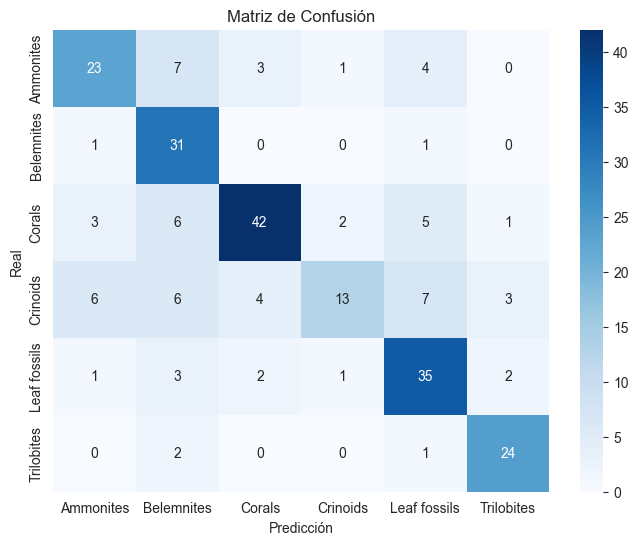

In [10]:
#  Gráfica de matriz de confusión
import seaborn as sns
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names, cmap="Blues")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()